In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import preprocessing

In [2]:
class Model:
    def __init__(self, data, output, learning_rate=0.01):
        """
        :data - Matrix of data: e.g. np.zeros((m, j))
        :output - Actual output for given data: np.zeros((m, 1))
        :theta - Vector of thetas
        
        where:
            j - number of features
            m - number of examples
        """
        self.data = np.c_[np.ones((len(data), 1)), data] # add bias units
        self.output = output
        self.theta = np.zeros((len(self.data[0]), 1))
        self.learning_rate = learning_rate

    def hypothesis(self, X):
        """
        Returns predicted value depending on X.
        
        :X - column vector of features.
        """
        return np.c_[np.ones((len(X), 1)), X].dot(self.theta)

    def cost_function(self):
        """
        Calculates how wrong the model is
        in terms of its prediction.
        """
        m = len(self.output)

        predictions = np.dot(self.data, self.theta)
        cost = np.sum(np.square(predictions - self.output)) / (2 * m)
        return cost

    def gradient_descent(self, iterations=100, plot=False, plot_freq=10):
        """
        Gradient descent algorithm.
        """
        m = len(self.output)
        for i in range(iterations):
            prediction = np.dot(self.data, self.theta)
            self.theta = self.theta - self.learning_rate * (self.data.T.dot((prediction - self.output)) / m)
            if i % plot_freq == 0 and plot:
                plt.plot(i, self.cost_function(), 'bo')
        if plot:
            plt.show()

In [3]:
X = 10 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

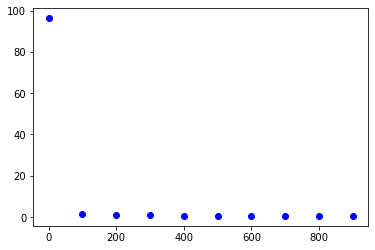

In [4]:
m = Model(X, y)
# preprocessing.scale(X) # feature scaling

#scaler = preprocessing.StandardScaler() # mean optimization
#scaler.fit(X)
#scaler.transform(X)
m.gradient_descent(1000, plot=True, plot_freq=100)

In [5]:
print(m.hypothesis([[100]]))

[[309.64730422]]


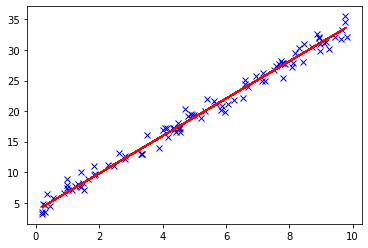

In [6]:
plt.plot(X, y, 'bx', X, m.hypothesis(X), 'r-')
plt.show()

In [7]:
X = np.random.rand(100,1).dot([[2,4,-3]])
y = 4 + X.dot(np.array([[3],[2],[6]])) + np.random.randn(100,1)

In [8]:
m = Model(X, y)
m.gradient_descent(1_750)

In [9]:
n = 78
print(X[n], y[n])
print(m.hypothesis([X[n]]))

[ 1.233297   2.466594  -1.8499455] [-1.02216189]
[[1.50010032]]


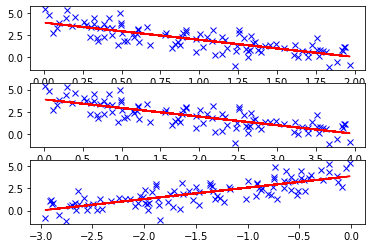

In [10]:
plt.figure()
N = 3
for i in range(1, N + 1):
    plt.subplot(int(str(N) + "1" + str(i)))
    plt.plot(X[:,i-1], y, 'bx', X[:,i-1], m.hypothesis(X), 'r-')

plt.show()

In [11]:
X = 4 + np.random.rand(100,1)
y = (X**2) + np.random.randn(100,1)

In [12]:
X = np.c_[X, X**2]
preprocessing.scale(X)

array([[-0.66952404, -0.68722538],
       [-0.17236812, -0.20239841],
       [-1.47982588, -1.44484911],
       [-0.65679315, -0.67499988],
       [-0.59947278, -0.6198315 ],
       [ 0.1240192 ,  0.0938724 ],
       [ 0.51088053,  0.48871102],
       [-1.11006617, -1.10413756],
       [ 1.4633438 ,  1.50004808],
       [ 1.58255422,  1.63055631],
       [ 0.59769682,  0.57858225],
       [-1.19628434, -1.18433434],
       [-0.03653569, -0.06729011],
       [ 0.35852262,  0.33211255],
       [-0.72207849, -0.73758802],
       [ 0.95121558,  0.94932851],
       [ 0.83165949,  0.82308598],
       [-0.52444417, -0.5473143 ],
       [-0.85226704, -0.86161527],
       [-1.76175973, -1.69898351],
       [ 0.01915593, -0.01156733],
       [ 0.69395841,  0.67877319],
       [-0.4834908 , -0.50758567],
       [-1.56908315, -1.5258343 ],
       [-1.59829023, -1.55222815],
       [ 0.49958625,  0.47705338],
       [-0.60386693, -0.62406783],
       [-0.01577005, -0.04653516],
       [ 0.70599531,

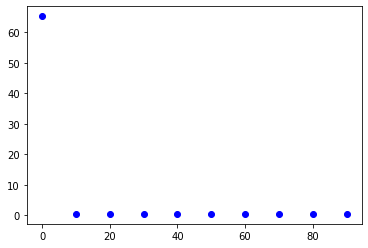

In [13]:
m = Model(X, y, 0.001)
m.gradient_descent(100, plot=True)

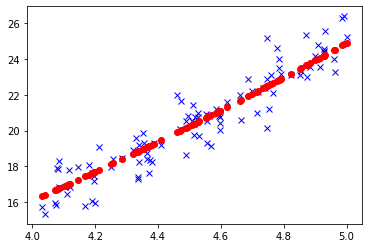

In [14]:
plt.plot(X[:,0], y, 'bx', X[:,0], m.hypothesis(X), 'ro')
plt.show()